In [ ]:
# Dam Break

In [1]:
%matplotlib inline

import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import lib

In [2]:
data = scipy.io.loadmat('../data/m46_dam_break_131017.mat')

# Figure 2a
Normalised RPE for a suite of models. Here there are 20 vertical levels, and a grid spacing of $\Delta x = 500m$, with a horizontal viscosity $\nu_h = 0.01$. MOM6 performs similarly to ROMS here.

In [3]:
t, rpeNorm = lib.rpe_norm('/scratch/mizuchi1/angus/spurious/lock_exchange/lock_exchange_KH0.01/prog.nc',
                         step=10)

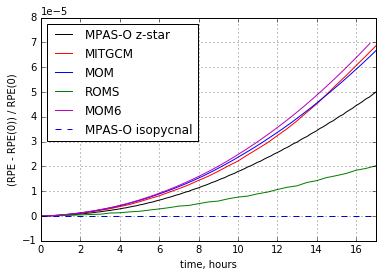

In [4]:
plt.plot(data['time'][0] / 3600, data['rpeNorm'][:,0], 'k-')

plt.plot(data['mitgcm_delta_x_500_time_days'][:,0], data['mitgcm_delta_x_500_drpe_dt'][0], 'r-')
plt.plot(data['mom_delta_x_500_time_days'][:,0], data['mom_delta_x_500_drpe_dt'][0], 'b-')
plt.plot(data['roms_delta_x_500_time_days'][:,0], data['roms_delta_x_500_drpe_dt'][:,0], 'g-')
plt.plot(t / 60, rpeNorm, 'm-')

plt.plot([0, 18], [0, 0], '--')

plt.xlabel('time, hours')
plt.ylabel('(RPE - RPE(0)) / RPE(0)')
plt.legend(['MPAS-O z-star', 'MITGCM', 'MOM', 'ROMS', 'MOM6', 'MPAS-O isopycnal'], loc='upper left')
plt.gca().set_xlim(0, 17)
plt.gca().set_ylim(-1e-5, 8e-5)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.grid()

# Figure 2b

dRPE/dt for $\nu_h = 0.01, 0.1, 1, 10, 100, 200$, averaged over the entire run. The grid Reynolds number is calculated using the theoretical front velocity of about 0.5m/s.

In [5]:
nu_h = ['0.01', '0.1', '1', '10', '100', '200']
drpe = np.array([lib.drpe_dt('/scratch/mizuchi1/angus/spurious/lock_exchange/lock_exchange_KH{}/prog.nc'.format(nu)) for nu in nu_h])
gridRe = 0.4956 * 0.5e3 / np.array(list(map(float, nu_h)))

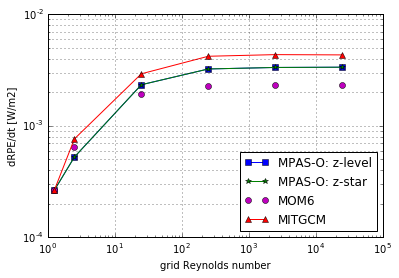

In [6]:
m = "s*"
for j in range(2):
    plt.loglog(data['gridRe'][0], data['meanDrpeDt'][0,j*6:(j+1)*6], '-*', marker=m[j])
    
plt.loglog(gridRe, drpe.mean(1), 'mo')
    
plt.loglog(data['mitgcm_dx_500_nu_changes_Re'][0], data['mitgcm_dx_500_nu_changes_drpe_dt'], '^r-')
plt.legend(['MPAS-O: z-level', 'MPAS-O: z-star', 'MOM6', 'MITGCM'], loc='lower right')
plt.xlabel('grid Reynolds number')
plt.ylabel('dRPE/dt [W/m2]')
plt.grid(which='both', axis='y')
plt.grid(axis='x')

# Figure 2c (MPAS)

This is the normalised RPE evolution in MPAS, across a variety of horizontal viscosities.

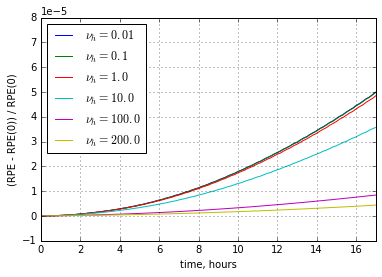

In [7]:
for j in range(6):
    plt.plot(data['time'][0] / 3600, data['rpeNorm'][:,j], '-')
    
plt.xlabel('time, hours')
plt.ylabel('(RPE - RPE(0)) / RPE(0)')
plt.legend([r'$\nu_h = {}$'.format(nu) for nu in data['nu_h'][0]], loc='upper left')
plt.gca().set_xlim(0, 17)
plt.gca().set_ylim(-1e-5, 8e-5)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.grid()

# Figure 2c (MOM6)

Let's recreate figure 2c (normalised RPE evolution) for MOM6 -- notice that in general the RPE grows more slowly, which is backed up by the previous figures.

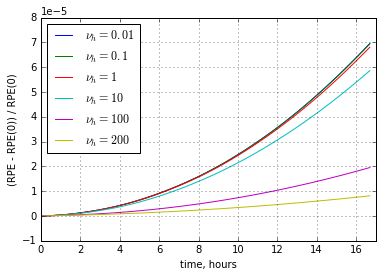

In [8]:
for nu in nu_h:
    t, rpeNorm = lib.rpe_norm('/scratch/mizuchi1/angus/spurious/lock_exchange/lock_exchange_KH{}/prog.nc'.format(nu),
                             step=10)
    plt.plot(t / 60, rpeNorm, label=r'$\nu_h = {}$'.format(nu))
    
plt.gca().set_xlim(0, 17)
plt.gca().set_ylim(-1e-5, 8e-5)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.grid()
plt.legend(loc='upper left')
plt.xlabel('time, hours')
plt.ylabel('(RPE - RPE(0)) / RPE(0)')

# dRPE/dt split

Let's look at the horizontal/vertical split of dRPE/dt for each grid Reynolds number. We do this by taking the difference of RPE across various stages of the timestep; i.e. across the dynamics for the contribution and across the ALE routine for the vertical contribution. Curiously, it seems as though the average vertical contribution is negative for many grid Reynolds numbers, so they don't show up here.

In [9]:
drpe_s = np.array([lib.drpe_dt_split('/scratch/mizuchi1/angus/spurious/lock_exchange/lock_exchange_KH{}/prog.nc'.format(nu)) for nu in nu_h])

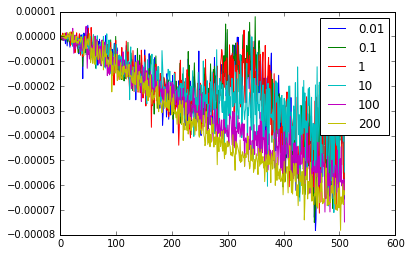

In [10]:
for k in range(len(nu_h)):
    plt.plot(drpe_s[k,1], label=nu_h[k])
    
plt.legend()

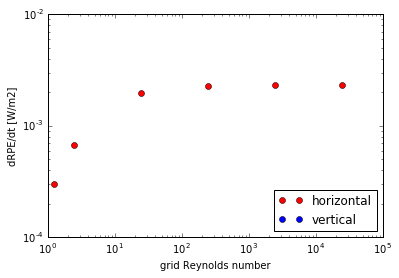

In [11]:
for k in range(len(nu_h)):
    plt.loglog(gridRe[k], drpe_s[k,0].mean(), 'ro')
    plt.loglog(gridRe[k], drpe_s[k,1].mean(), 'bo')
    
plt.legend(['horizontal', 'vertical'], loc='lower right')
plt.xlabel('grid Reynolds number')
plt.ylabel('dRPE/dt [W/m2]')